#**CSIE5732 Computer Vision, NTU, TPE**
[Homework4](http://cv2.csie.ntu.edu.tw/CV/hw2019/hw4.html)


>Deadline : 2022-10-18

> Hello TA, the colab file can be found in the [URL](https://colab.research.google.com/drive/1R_S8qmHpyrppb6qOoXjjAWyRMn2xbjuV?usp=sharing)





##Description:
###Part1. Write a program to do the following requirement.
*   (a) upside-down lena.bmp
*   (b) right-side-left lena.bmp
*   (c) diagonally flip lena.bmp

###Part2. Write a program or use software to do the following requirement.
*   (d) rotate lena.bmp 45 degrees clockwise
*   (e) shrink lena.bmp in half
*   (f) binarize lena.bmp at 128 to get a binary image

###Announcement
*   You may use any programming language of your choice to implement the functions required in assignment #1, provided that you do not use any library calls except for basic image IO (e.g. OpenCV).
*   For part 2, you can use any image processing software. In your report, you must specify which software you used to obtain the required results.

*   Grading policy
    * Failing to provide a report will reduce your grade by 1~2 levels.
    * Using restricted functions within your program (unless specified) will result in a failure of your work.
*   Hint: You can use any programing language to implement homework. However don't just call libraries, if just call libraries you will get zero point.


###**FAQ**
*   Q1: 作業是否可以用numpy一次處理多個像素?
>不可以，如python numpy.ndarray.T或是matlab的 A'都不行。
>但是不能使用像是opencv的flip、getRotationMatrix2D、threshold等現成函式。
*   Q4: 請問投影片中的 hvision.h 和 B_PIX 要如何使用?
>hvision.h 和 B_PIX 是多年前比較舊的套件，不推薦使用。
>建議可以用C++ 或 python 的 OpenCV、Matlab 來實作此次作業。
*   Q5: 請問如何繳交作業?
>用 Filezilla client 登入 (IP: 140.112.31.83, account: 2022cv1,password:2022cv1, port: 12000) 將作業上傳到指定資料夾內。




##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **cv2**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.






In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

##Step2: define the class for the six transformations
> we implement the six transformations as the private methods under the classs 'HW1'

In [ ]:
class HW1:
    def __init__(self, dirc, objc):
        self.img    = cv2.imread(dirc+objc,0)
        self.dirc    = dirc
        self.shape  = self.img.shape
        self.nRow  = self.img.shape[0]
        self.nCol   = self.img.shape[1]
    def original(self):
        return self.img
    def upSideDown(self):
        ans = np.zeros(self.shape, int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                ans[rowIdx, colIdx] = self.img[ self.nRow-rowIdx-1, colIdx]
        return ans
    def rightSideLeft(self):
        ans = np.zeros(self.shape, int)
        for colIdx in range(self.nCol):
            for rowIdx in range(self.nRow):
                ans[rowIdx, colIdx] = self.img[ rowIdx, self.nCol-colIdx-1 ]
        return ans
    def diagonallyFlip(self):
        ans = np.zeros(self.shape, int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                ans[rowIdx, colIdx] = self.img[ self.nRow-rowIdx-1, self.nCol-colIdx-1 ]
        return ans
    def rotateClockwise(self, angle):
        newShape = [self.nCol, self.nRow]
        imgCenter = tuple( np.array ( newShape )/2 )
        rot_mat = cv2.getRotationMatrix2D(imgCenter, -angle, 1.0)
        return cv2.warpAffine(self.img, rot_mat, newShape, flags=cv2.INTER_LINEAR)
    def rotate90Clockwise(self):
        ans = np.zeros((self.nCol,self.nRow), int)
        for rowIdx in range(self.nCol):
            for colIdx in range(self.nRow):
                ans[rowIdx, colIdx] = self.img[ self.nRow-colIdx-1, rowIdx ]
        return ans
    def shrinkInHalf(self,method):
        newWidth    = self.nCol //2
        newHeight   = self.nRow//2
        newShape    = (newWidth, newHeight)
        #interpolation algorithms
        if method=='INTER_NEAREST':
            #nearest neighbor interpolation
            return cv2.resize(self.img, newShape, interpolation=cv2.INTER_NEAREST)
        elif method=='INTER_LINEAR':
            #bilinear interpolation
            return cv2.resize(self.img, newShape, interpolation=cv2.INTER_LINEAR)
        elif method=='INTER_CUBIC':
            #bicubic interpolation
            return cv2.resize(self.img, newShape, interpolation=cv2.INTER_CUBIC)
        elif method=='INTER_AREA':
            #resampling using pixel area relation.
            return cv2.resize(self.img, newShape, interpolation=cv2.INTER_AREA)
        elif method=='INTER_LANCZOS4':
            #Lanczos interpolation over 8x8 neighborhood
            return cv2.resize(self.img, newShape, interpolation=cv2.INTER_LANCZOS4)
        elif method=='INTER_LINEAR_EXACT':
            #Bit exact bilinear interpolation
            return cv2.resize(self.img, newShape, interpolation=cv2.INTER_LINEAR_EXACT)
        elif method=='INTER_NEAREST_EXACT':
            #Bit exact nearest neighbor interpolation.
            return cv2.resize(self.img, newShape, interpolation=cv2.INTER_NEAREST_EXACT)
    def binarize(self, thresh, maxval):
        ans = np.zeros(self.shape, int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                ans[rowIdx, colIdx] = maxval if self.img[ rowIdx, colIdx ] > thresh else 0
        return ans

In [ ]:
a =

In [ ]:
import numpy as np
a = np.array([[1, 0],[0, 1]])
b = np.array([[4, 1],[2, 2]])
np.matmul(a, b)

array([[4, 1],
       [2, 2]])

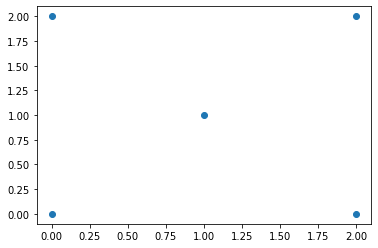

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([

    [1,1],
[0 ,0],
[2 ,0],
[2 ,2],
[0 ,2],
])
x, y = data.T
plt.scatter(x,y)
plt.show()

##Step3 Initiate an object from the class constructor

In [ ]:
dir_ = '/content/'
# img1 = 'soccer.jpeg'
img2 = 'lena.bmp'
# obj1 = HW1(dir_,img1)
obj2 = HW1(dir_,img2)

##Step4: Carry out the six transformations

### the orignal image
    

In [ ]:
# cv2_imshow(obj1.original())
cv2_imshow(obj2.original())

NameError: ignored

###(a) upside-down lena.bmp
    #   original pixel (i,j)   --->   position of pixel after the transformation
    #   11  12  13  14   --->   21  22  23  24
    #   21  22  23  25          11  12  13  14
    

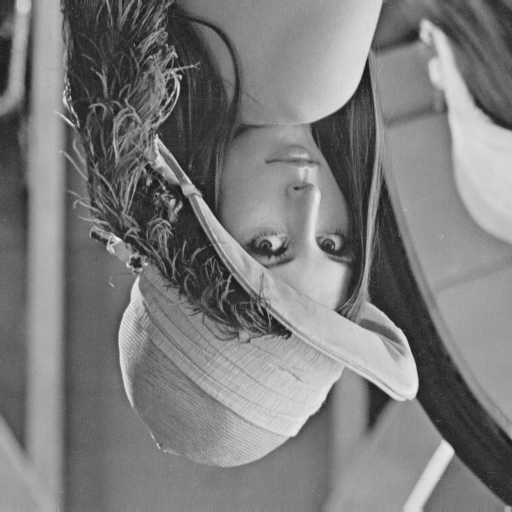

In [ ]:
# cv2_imshow(obj1.upSideDown())
cv2_imshow(obj2.upSideDown())

### (b) right-side-left lena.bmp
    #   11  12  13  14   --->   14  13  12  11
    #   21  22  23  24          24  23  22  21
    

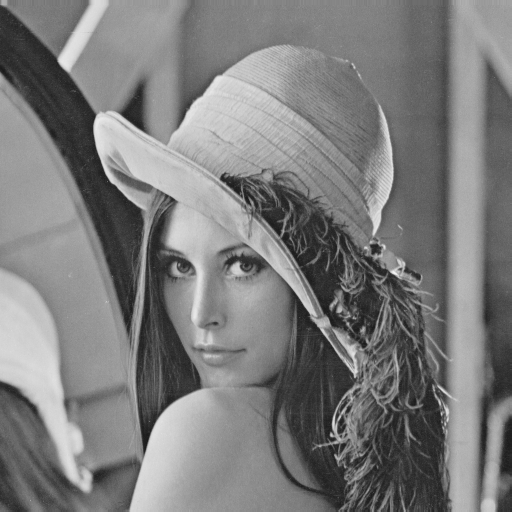

In [ ]:
# cv2_imshow(obj1.rightSideLeft())
cv2_imshow(obj2.rightSideLeft())

### (c) diagonally flip lena.bmp
    #   11  12  13  14   --->   24  23  22  21
    #   21  22  23  24          14  13  12  11
>Part1.(c) 的 diagonal mirrored 是要鏡射還是翻轉?
因為有許多同學會有誤會，因此我們將題目改成 diagonal flip，是要對角的翻轉
>Q6: 請問作業
    * (c)對角線是哪一條?
>(c)兩條都可以。
    

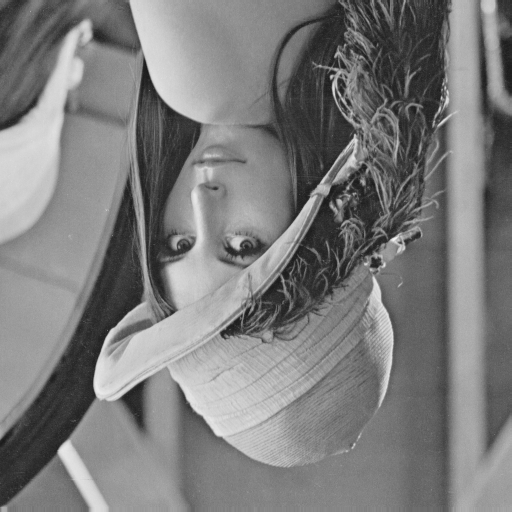

In [ ]:
# cv2_imshow(obj1.diagonallyFlip())
cv2_imshow(obj2.diagonallyFlip())

### (d) rotate lena.bmp 45 degrees clockwise
 we use the following two functions  to implement the function

*   [getRotationMatrix2D](https://tinyurl.com/2pnnb4cu) : Calculates an affine matrix of 2D rotation. 計算二維旋轉的仿射矩陣。
*   [warpAffine](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) : Applies an affine transformation to an image. 對圖像應用仿射變換。

**Questions**
*   1.旋轉45度以後的圖片大小為何?
>都可以，看得出來有旋轉即可，邊角被切掉也可以。
*   2.請問part2用如果也用程式寫，是否有限定函式?
>沒有限制哦，如果part2要用程式來完成，並不限制函式。

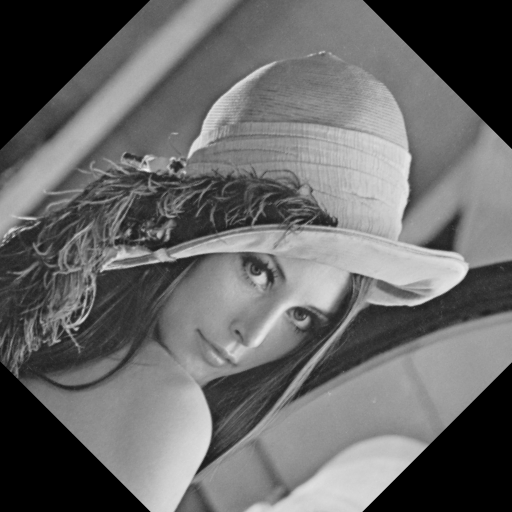

In [ ]:
# cv2_imshow(obj1.rotateClockwise(45))
cv2_imshow(obj2.rotateClockwise(45))

### (e) shrink lena.bmp in half
**interpolation algorithms**
*    [nearest neighbor interpolation](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation)
*    [bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation)
*    [bicubic interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation)
*    [resampling using pixel area relation](https://medium.com/@wenrudong/what-is-opencvs-inter-area-actually-doing-282a626a09b3)
*    [Lanczos interpolation over 8x8 neighborhood](https://en.wikipedia.org/wiki/Lanczos_algorithm)
*    Bit exact bilinear interpolation
*    Bit exact nearest neighbor interpolation

we use the function [cv.resize()](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)  to implement the function.

**Questions**
*   1.縮小一半是邊長還是面積?
>邊長。
*   2.請問part2用如果也用程式寫，是否有限定函式?
>沒有限制哦，如果part2要用程式來完成，並不限制函式。

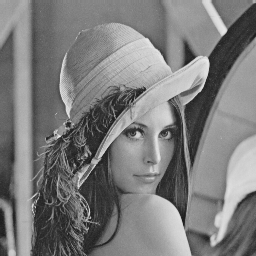

In [ ]:
# cv2_imshow( obj1.shrinkInHalf("INTER_NEAREST") )
cv2_imshow( obj2.shrinkInHalf("INTER_NEAREST") )

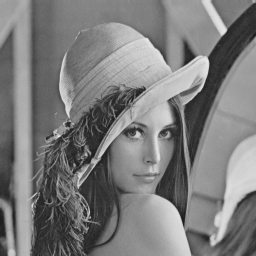

In [ ]:
# cv2_imshow( obj1.shrinkInHalf("INTER_LINEAR") )
cv2_imshow( obj2.shrinkInHalf("INTER_LINEAR") )

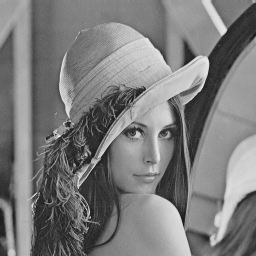

In [ ]:
# cv2_imshow( obj1.shrinkInHalf("INTER_CUBIC") )
cv2_imshow( obj2.shrinkInHalf("INTER_CUBIC") )

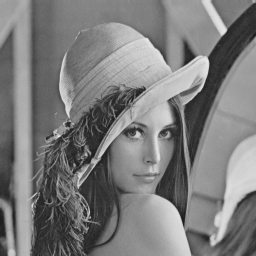

In [ ]:
# cv2_imshow( obj1.shrinkInHalf("INTER_AREA") )
cv2_imshow( obj2.shrinkInHalf("INTER_AREA") )

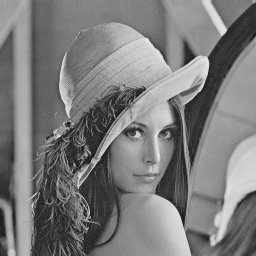

In [ ]:
# cv2_imshow( obj1.shrinkInHalf("INTER_LANCZOS4") )
cv2_imshow( obj2.shrinkInHalf("INTER_LANCZOS4") )

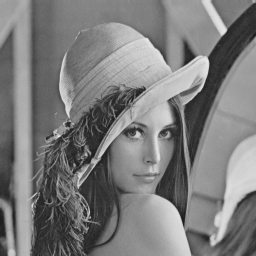

In [ ]:
# cv2_imshow( obj1.shrinkInHalf("INTER_LINEAR_EXACT") )
cv2_imshow( obj2.shrinkInHalf("INTER_LINEAR_EXACT") )

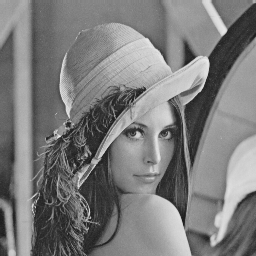

In [ ]:
# cv2_imshow( obj1.shrinkInHalf("INTER_NEAREST_EXACT") )
cv2_imshow( obj2.shrinkInHalf("INTER_NEAREST_EXACT") )

### (f) binarize lena.bmp at 128 to get a binary image

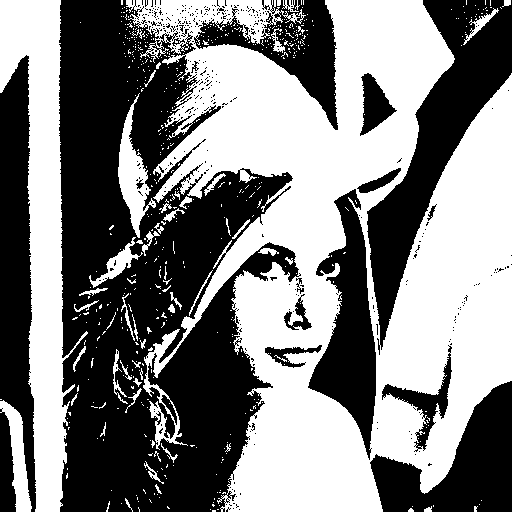

In [ ]:
threshold = 128
maxval   = 255
# cv2_imshow(obj1.binarize(threshold, maxval))
cv2_imshow(obj2.binarize(threshold, maxval))

**Experiment 1 : raise the threshold**
>we can see that only pixel that are very light (intensity betwen 192 and 255) are represented as white (intensity=255), while most of the pixels are black (intensity=0)

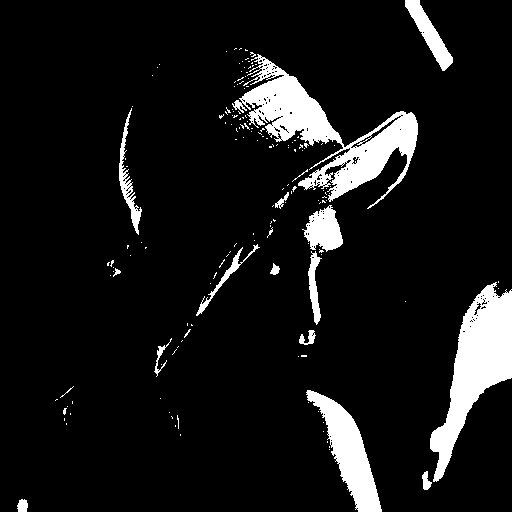

In [ ]:
## exp1 : if we increase the threshold
threshold = 192
maxval   = 255
# cv2_imshow(obj1.binarize(threshold, maxval))
cv2_imshow(obj2.binarize(threshold, maxval))

**Experiment 2 : reduce the threshold**
>we can see that only pixels that are very dark (intensity betwen 0 and 63) are represented as black (intensity=0), while most of the remaining pixels are white (intensity=255)

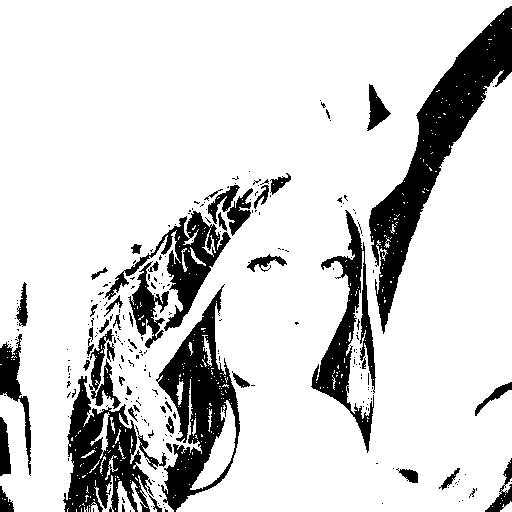

In [ ]:
## exp2 : if we reduce the threshold
threshold = 64
maxval   = 255
# cv2_imshow(obj1.binarize(threshold, maxval))
cv2_imshow(obj2.binarize(threshold, maxval))